In [24]:
import string
import collections

In [25]:
def clean_gutenberg_book(text):
    """
    Function cleans text 
        Arguments:
            - text (string) - text string, book
    Returns clean text
    """
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    start = "start of the project gutenberg ebook"
    end = "end of the project gutenberg ebook"
    start_pos = text.find(start)
    end_pos = text.find(end)

    return text[start_pos:end_pos]

In [26]:
import pandas as pd

In [27]:
def count_words(file, clean_text=False):
    """
    Function to count the number of words in a file. 
        Arguments:
            -file (string) - string file to count words
            -clean_text (boolean) - if True the text is cleaned before counting words
    Function returns Dataframe with words, word counts, frequency and rank. 
   """
    # Open and read the file
    with open(file, 'r', encoding="utf-8") as f:
        text = f.read()

    if clean_text:
        text = clean_gutenberg_book(text)

    # Split the text into words
    words = text.split()
    word_counts = collections.Counter(words)
    total_words = sum(word_counts.values())

    #Create Dataframe with words, word count in text, frequency
    words_df = pd.DataFrame(
        [(word, count, count / total_words) for word, count in word_counts.items()],
        columns=['Word', 'Count', 'Frequency']
    )

    # Assigning Rank to Dataframe
    words_df = words_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
    words_df['Rank'] = words_df.index + 1

    return words_df


In [28]:
def zipf_low_distribution(rank, s, c):
    """
    Function calculates the probability for a given rank in the Zipf distribution.
        Arguments:
        - rank (int) - the rank of the distribution, must be greater than zero
        - s (float) - the size of the distribution
        - c - normalization constant
    
    """
    return c / rank ** s


*The normalization Constant* - ensures that the sum of probabilities in the distribution equal to 1. It is calculated based oin the generalized harmonic sum.

In [29]:
def calculate_c_param(alfa, n):
    """
    Function calculates normalization constant for th Zipf low distribution.
        Arguments:
        - alfa (float) - the alfa, the exponent
        - n (int) - total number of ranks
    Returns normalization constant for th Zipf low distribution.
    """
    
    harmonic_sum = 0
    for r in range(1,n+1):
         # Calculate the harmonic sum for the Zipf distribution
        harmonic_sum += 1 / (r ** alfa)

    # Calculate the normalization constant c_param to ensure probabilities sum to 1
    c_param = 1 / harmonic_sum
    return c_param


In [30]:
book_files = ["esperanto.txt", "spanish.txt","polkski.txt","german.txt","greek.txt"]
book_titles = ["Esperanto","Spanish","Polish", "German", "Greek"]

In [31]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

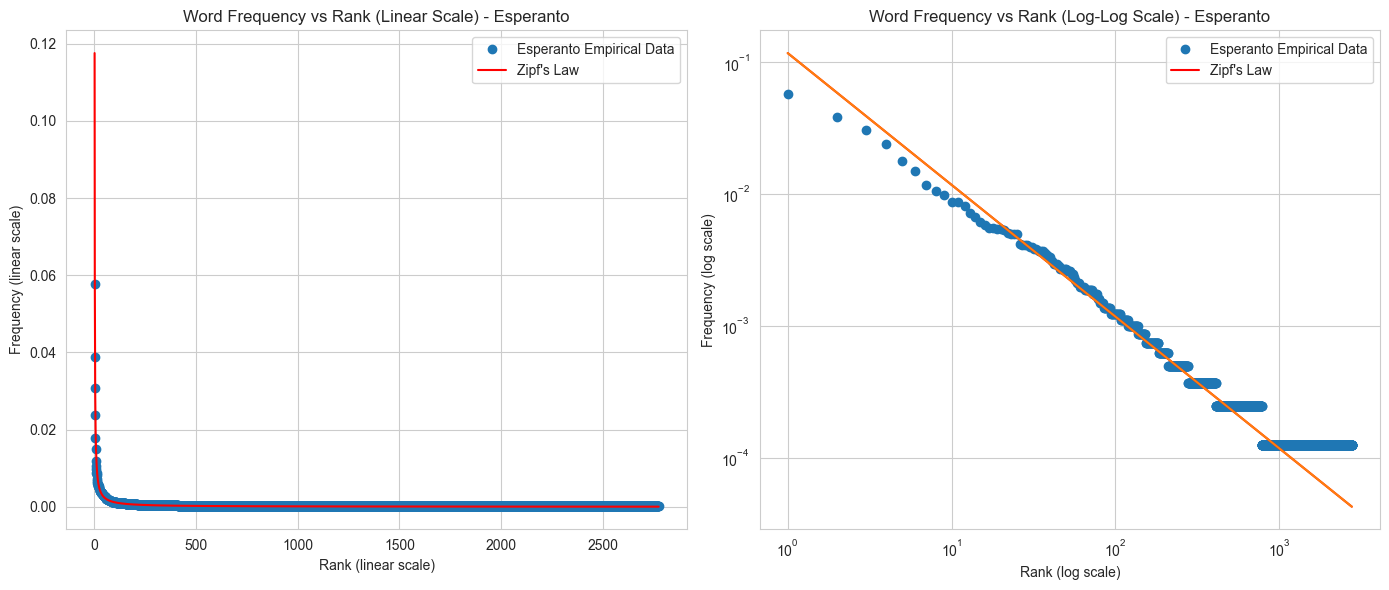

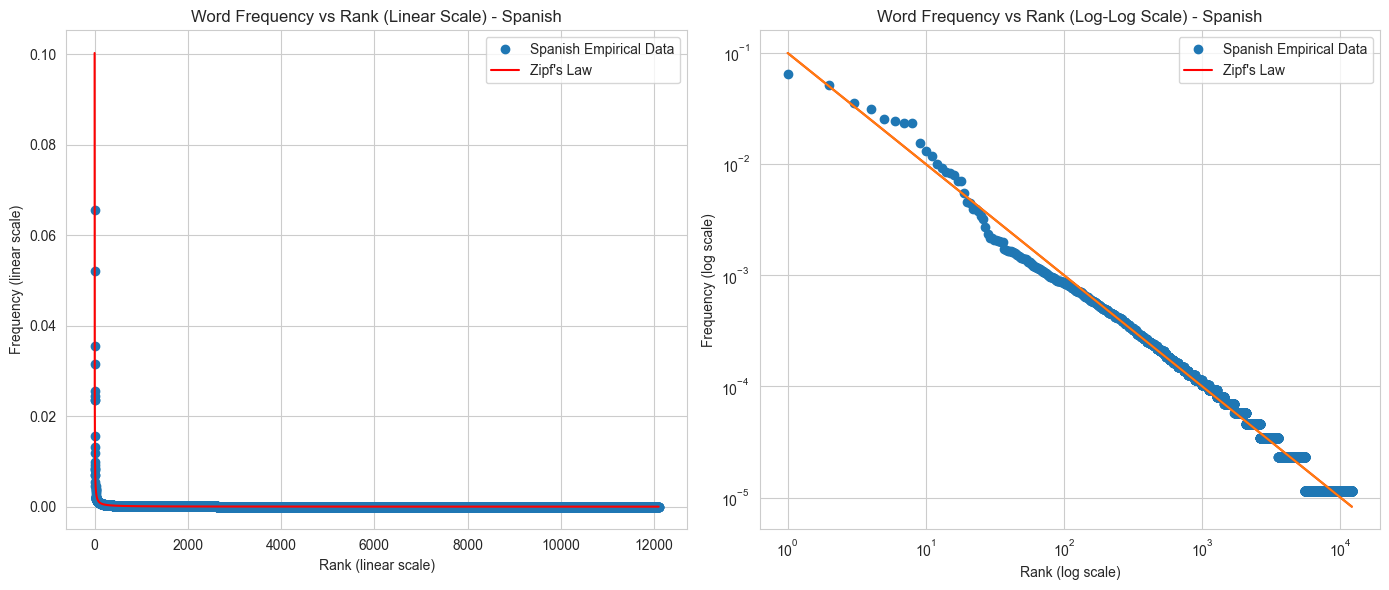

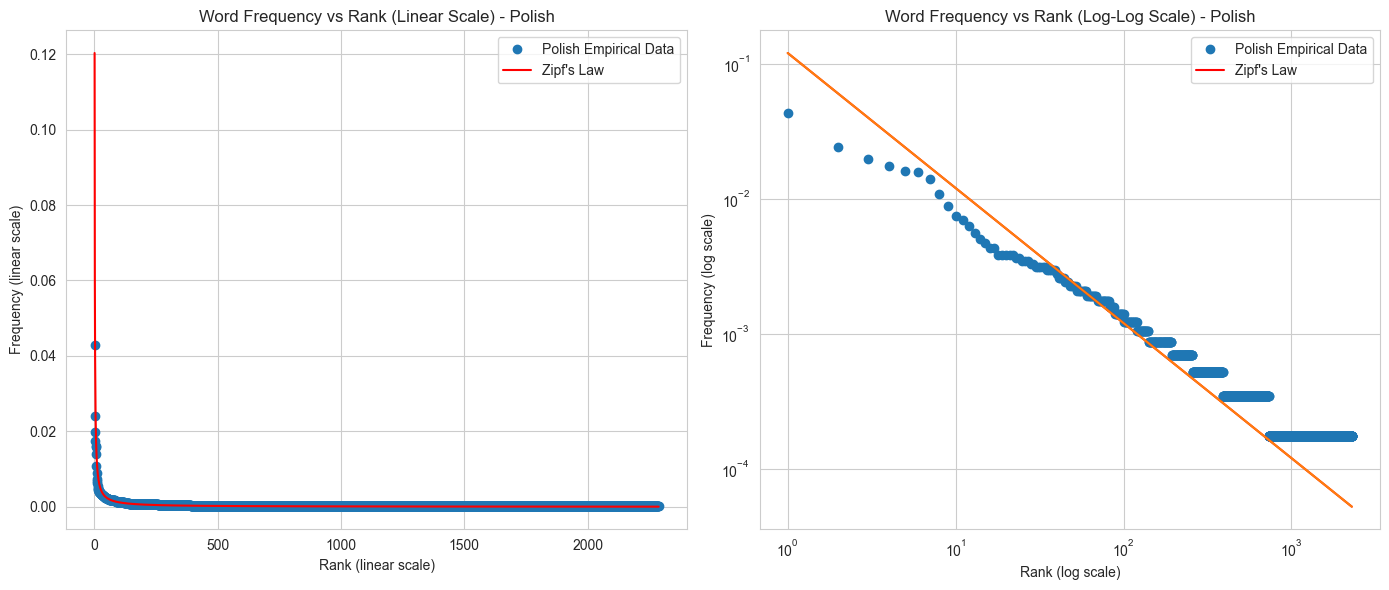

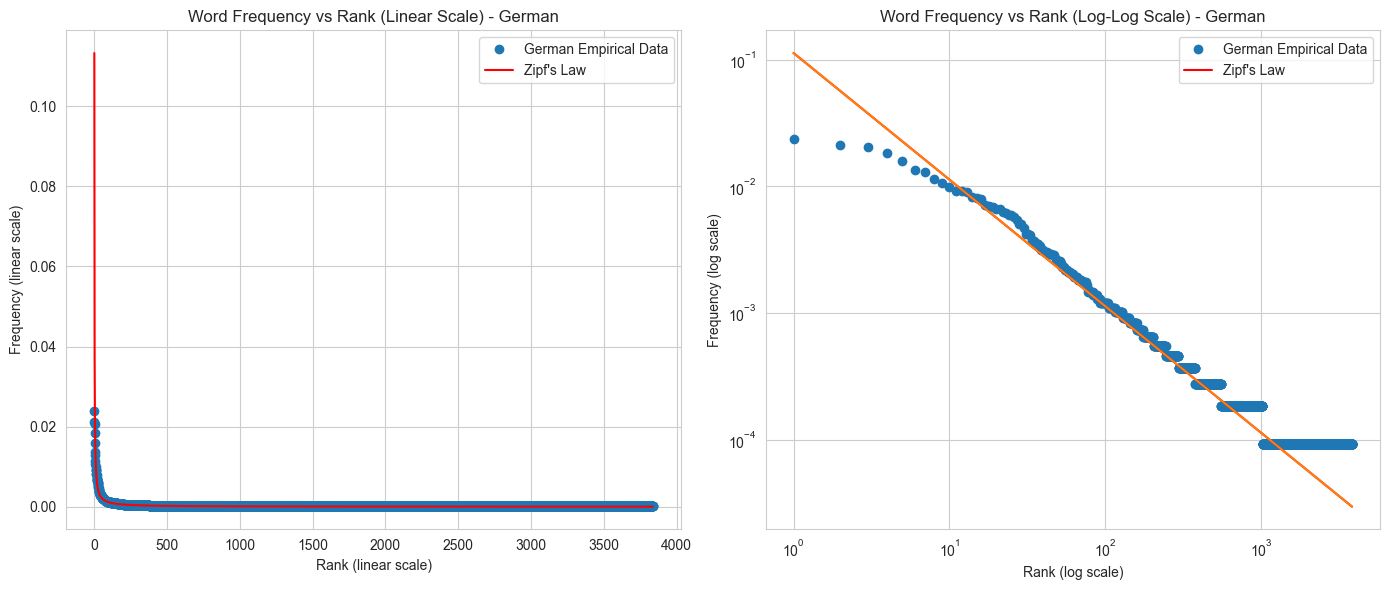

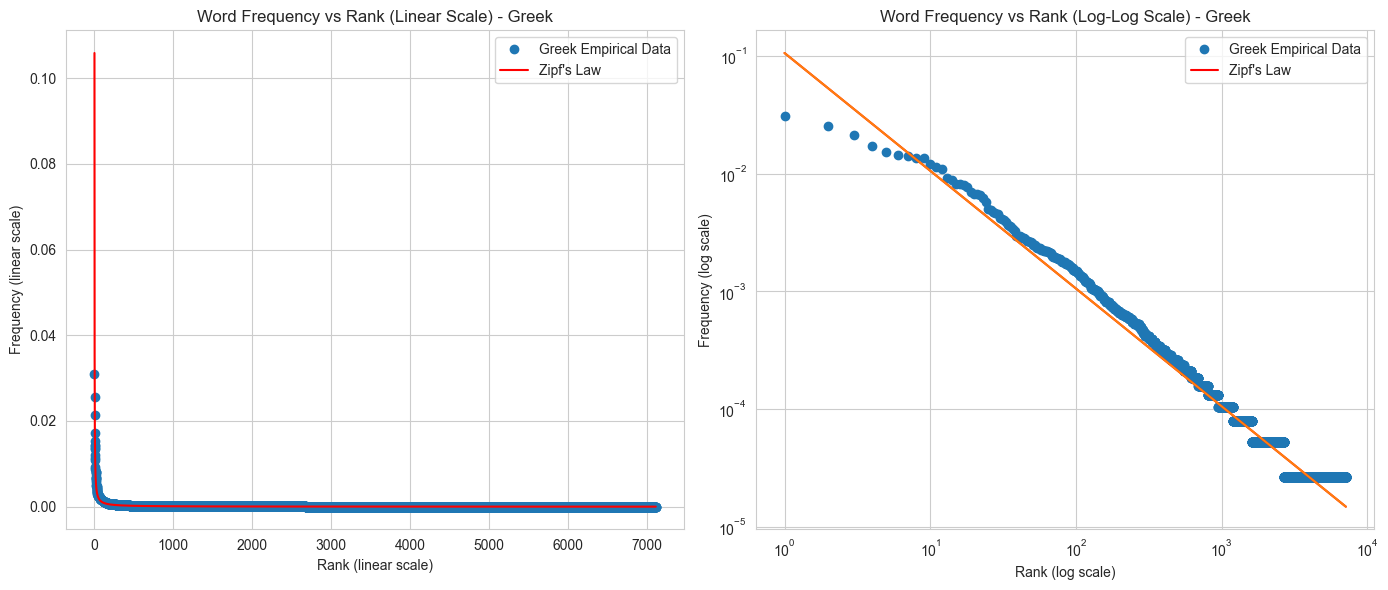

In [32]:
plt.figure(figsize=(10, 6))

#plotting graphs for all book_df
for i, book_file in enumerate(book_files):
   
    word_df = count_words(book_file, clean_text=True)
    rank = np.array(word_df['Rank'])
    s = 1  
    c = calculate_c_param(s, len(word_df))
    zipf_dist = zipf_low_distribution(rank, s, c)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # plotting graph for linear scale
    axes[0].plot(word_df['Rank'], word_df['Frequency'], marker='o', linestyle='none', label=f'{book_titles[i]} Empirical Data')
    axes[0].plot(rank, zipf_dist, color='red', label=f"Zipf's Law ")
    axes[0].set_title(f'Word Frequency vs Rank (Linear Scale) - {book_titles[i]}')
    axes[0].set_xlabel('Rank (linear scale)')
    axes[0].set_ylabel('Frequency (linear scale)')
    axes[0].grid(True)
    axes[0].legend()
    
    #plotting graph for logarithmic scale
    axes[1].loglog(word_df['Rank'], word_df['Frequency'], marker='o', linestyle='none', label=f'{book_titles[i]} Empirical Data')
    axes[1].loglog(rank, zipf_dist, color='red', label=f"Zipf's Law ")
    axes[1].set_title(f'Word Frequency vs Rank (Log-Log Scale) - {book_titles[i]}')
    axes[1].set_xlabel('Rank (log scale)')
    axes[1].set_ylabel('Frequency (log scale)')
    axes[1].grid(True)
    axes[1].legend()
    plt.tight_layout()
    
    plt.loglog(rank, zipf_dist, label=f'{book_titles[i]} (s={s})')


In [33]:
import seaborn as sns

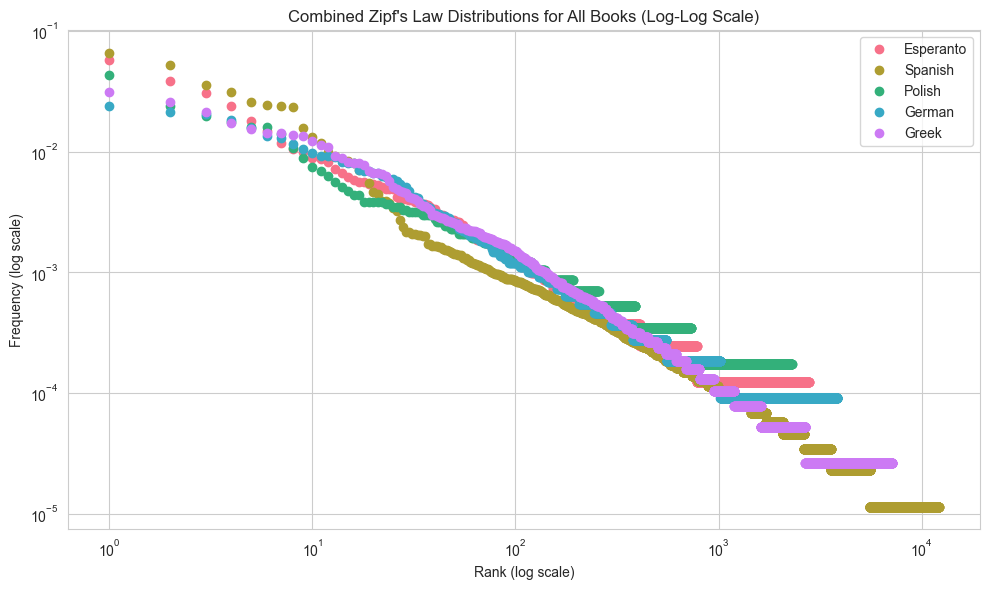

In [34]:

colors = sns.color_palette("husl", len(book_files))

plt.figure(figsize=(10, 6))

for i, book_file in enumerate(book_files):

    word_df = count_words(book_file, clean_text=True)
    rank = np.array(word_df['Rank'])
    s = 1  
    c = calculate_c_param(s, len(word_df))
    zipf_dist = zipf_low_distribution(rank, s, c)

    plt.loglog(word_df['Rank'], word_df['Frequency'], label=f'{book_titles[i]}', color=colors[i], marker='o', linestyle='none')

plt.title('Combined Zipf\'s Law Distributions for All Books (Log-Log Scale)')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()